In [18]:
import networkx as nx
import networkx as nx
from networkx.algorithms import approximation as approx
import numpy as np
import seaborn as sns

In [19]:
tiles = np.array([
    [340, 339, 338, 337, 336, 335, 334],
    [326, 325, 324, 323, 322, 321, 320],
    [312, 311, 310, 309, 308, 307, 306],
    [298, 297, 296, 295, 294, 293, 292],
    [284, 283, 282, 281, 280, 279, 278],
    [270, 269, 268, 267, 266, 265, 264], 
])

In [20]:
tiles.shape

(6, 7)

In [21]:
G = nx.Graph()

In [22]:
for i in tiles.flatten():
    G.add_node(i)

In [23]:
rows, cols = len(tiles), len(tiles[0])
print(rows, cols)

6 7


In [24]:
def add_edges_based_on_adjacent_elements(graph, matrix):
    rows = len(matrix)
    cols = len(matrix[0])

    for i in range(rows):
        for j in range(cols):
            adjacent_elements = []

            # Iterate through adjacent elements
            for x in range(max(0, i-1), min(rows, i+2)):
                for y in range(max(0, j-1), min(cols, j+2)):
                    if x != i or y != j:
                        graph.add_edge(matrix[i][j], matrix[x][y])

In [25]:
add_edges_based_on_adjacent_elements(G, tiles)

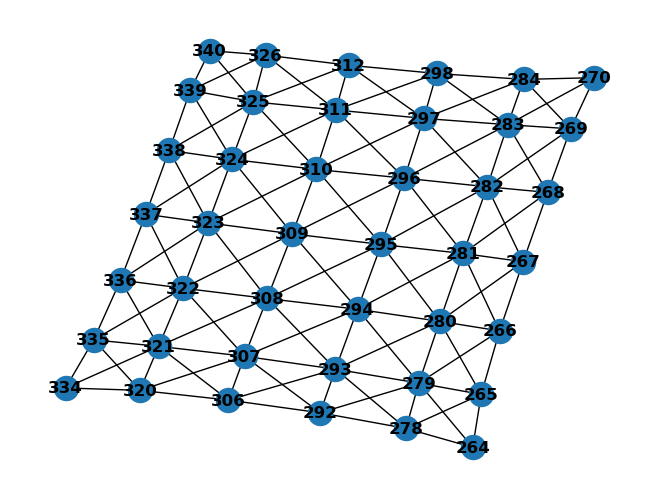

In [27]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

# Graph coloring

https://en.wikipedia.org/wiki/Graph_coloring


In [28]:
coloring = nx.greedy_color(G, strategy="largest_first")

In [29]:
for node, color in coloring.items():
    print(f"Node {node} is colored with {color}")

Node 325 is colored with 0
Node 324 is colored with 1
Node 323 is colored with 0
Node 322 is colored with 1
Node 321 is colored with 0
Node 311 is colored with 2
Node 310 is colored with 3
Node 309 is colored with 2
Node 308 is colored with 3
Node 307 is colored with 2
Node 297 is colored with 0
Node 296 is colored with 1
Node 295 is colored with 0
Node 294 is colored with 1
Node 293 is colored with 0
Node 283 is colored with 2
Node 282 is colored with 3
Node 281 is colored with 2
Node 280 is colored with 3
Node 279 is colored with 2
Node 339 is colored with 2
Node 338 is colored with 3
Node 337 is colored with 2
Node 336 is colored with 3
Node 335 is colored with 2
Node 326 is colored with 1
Node 320 is colored with 1
Node 312 is colored with 3
Node 306 is colored with 3
Node 298 is colored with 1
Node 292 is colored with 1
Node 284 is colored with 3
Node 278 is colored with 3
Node 269 is colored with 0
Node 268 is colored with 1
Node 267 is colored with 0
Node 266 is colored with 1
N

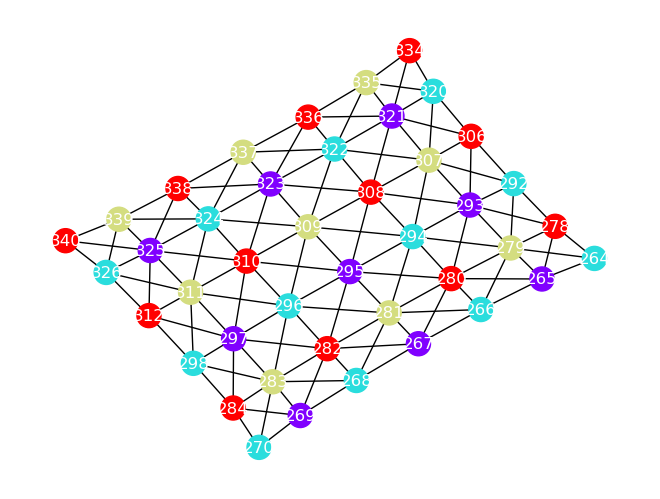

In [49]:
# Visualize the graph with colors
pos = nx.spring_layout(G)
node_colors = [coloring[node] for node in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, font_color="white")
plt.show()

# Max Independent set

https://en.wikipedia.org/wiki/Independent_set_(graph_theory)

Maximum independent set of G: {312, 334, 336, 306, 338, 308, 340, 278, 310, 280, 282, 284}


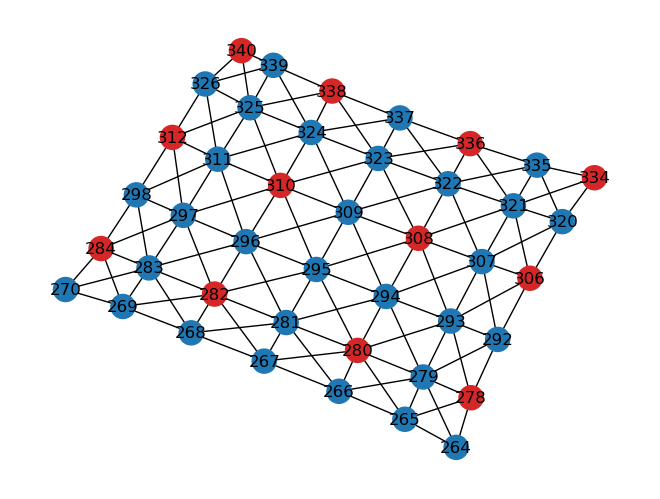

In [16]:
I = approx.maximum_independent_set(G)
print(f"Maximum independent set of G: {I}")
pos = nx.spring_layout(G, seed=39299899)
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_color=["tab:red" if n in I else "tab:blue" for n in G],
)

# Other unrelated things

In [10]:
# Find connected components
groups = list(nx.connected_components(G))

I see, you want to partition the graph into N subgroups such that nodes within the same subgroup are not directly connected. This problem is a bit different and typically involves finding a partition that minimizes the number of edges between the subgroups. Unfortunately, this is a computationally challenging problem known as graph partitioning, and it might not have a straightforward solution.

One way to approach this is to use spectral graph partitioning techniques. The idea is to use the eigenvalues and eigenvectors of the graph's adjacency matrix to find a partition that minimizes the cut between the subgroups. The scikit-learn library in Python provides tools for spectral clustering:

In [16]:
num_groups = 4


In [38]:
adj_matrix = nx.adjacency_matrix(G).todense()
print(adj_matrix[0:20, 0:20])

[[0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0]
 [1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0]
 [0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0]
 [0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1]
 [0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1]
 [0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0]]


In [22]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')

In [24]:
labels = spectral.fit_predict(adj_matrix)

/home/jorge/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


In [35]:
labels.reshape(6, 7)

array([[2, 2, 2, 2, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3],
       [1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0]], dtype=int32)

In [31]:
node_subgroup_mapping = {node: subgroup_id for node, subgroup_id in enumerate(labels)}

<Axes: >

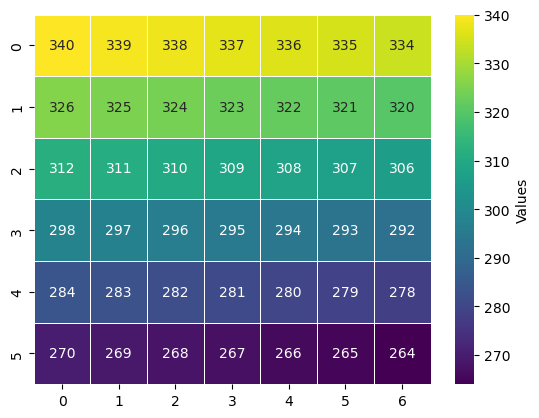

In [33]:
sns.heatmap(tiles, cmap='viridis', annot=True, fmt="03d", linewidths=.5, cbar_kws={'label': 'Values'})

Independent set
https://en.wikipedia.org/wiki/Independent_set_(graph_theory)

In [20]:
# Add edges for adjacent tiles
for i in range(rows):
    for j in range(cols):
        current_tile_id = tiles[i, j]
        print(current_tile_id)

        # Check and add edges for adjacent tiles
        if i > 0:
            above_tile_id = tiles[i - 1, j]
            print("above", above_tile_id)
        if i < rows - 1:
            below_tile_id = tiles[i + 1, j]
            print("below", below_tile_id)
        if j > 0:
            left_tile_id = tiles[i, j - 1]
            print("left", left_tile_id)
        if j < cols - 1:
            right_tile_id = tiles[i, j + 1]
            print("right", right_tile_id)

        print("------------------")

340
below 326
right 339
------------------
339
below 325
left 340
right 338
------------------
338
below 324
left 339
right 337
------------------
337
below 323
left 338
right 336
------------------
336
below 322
left 337
right 335
------------------
335
below 321
left 336
right 334
------------------
334
below 320
left 335
------------------
326
above 340
below 312
right 325
------------------
325
above 339
below 311
left 326
right 324
------------------
324
above 338
below 310
left 325
right 323
------------------
323
above 337
below 309
left 324
right 322
------------------
322
above 336
below 308
left 323
right 321
------------------
321
above 335
below 307
left 322
right 320
------------------
320
above 334
below 306
left 321
------------------
312
above 326
below 298
right 311
------------------
311
above 325
below 297
left 312
right 310
------------------
310
above 324
below 296
left 311
right 309
------------------
309
above 323
below 295
left 310
right 308
------------------
3

In [18]:
tiles[0, 0]

340

In [22]:

def print_adjacent_elements(matrix):
    rows = len(matrix)
    cols = len(matrix[0])

    for i in range(rows):
        for j in range(cols):
            adjacent_elements = []

            # Iterate through adjacent elements
            for x in range(max(0, i-1), min(rows, i+2)):
                for y in range(max(0, j-1), min(cols, j+2)):
                    if x != i or y != j:
                        adjacent_elements.append(matrix[x][y])

            # Print the current element and its adjacent elements
            print(f"Element at ({i}, {j}): {matrix[i][j]}, Adjacent elements: {adjacent_elements}")

# Example usage:
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print_adjacent_elements(matrix)

Element at (0, 0): 1, Adjacent elements: [2, 4, 5]
Element at (0, 1): 2, Adjacent elements: [1, 3, 4, 5, 6]
Element at (0, 2): 3, Adjacent elements: [2, 5, 6]
Element at (1, 0): 4, Adjacent elements: [1, 2, 5, 7, 8]
Element at (1, 1): 5, Adjacent elements: [1, 2, 3, 4, 6, 7, 8, 9]
Element at (1, 2): 6, Adjacent elements: [2, 3, 5, 8, 9]
Element at (2, 0): 7, Adjacent elements: [4, 5, 8]
Element at (2, 1): 8, Adjacent elements: [4, 5, 6, 7, 9]
Element at (2, 2): 9, Adjacent elements: [5, 6, 8]


In [26]:
add_edges_based_on_adjacent_elements(tiles)

340 339
340 326
340 325
339 340
339 338
339 326
339 325
339 324
338 339
338 337
338 325
338 324
338 323
337 338
337 336
337 324
337 323
337 322
336 337
336 335
336 323
336 322
336 321
335 336
335 334
335 322
335 321
335 320
334 335
334 321
334 320
326 340
326 339
326 325
326 312
326 311
325 340
325 339
325 338
325 326
325 324
325 312
325 311
325 310
324 339
324 338
324 337
324 325
324 323
324 311
324 310
324 309
323 338
323 337
323 336
323 324
323 322
323 310
323 309
323 308
322 337
322 336
322 335
322 323
322 321
322 309
322 308
322 307
321 336
321 335
321 334
321 322
321 320
321 308
321 307
321 306
320 335
320 334
320 321
320 307
320 306
312 326
312 325
312 311
312 298
312 297
311 326
311 325
311 324
311 312
311 310
311 298
311 297
311 296
310 325
310 324
310 323
310 311
310 309
310 297
310 296
310 295
309 324
309 323
309 322
309 310
309 308
309 296
309 295
309 294
308 323
308 322
308 321
308 309
308 307
308 295
308 294
308 293
307 322
307 321
307 320
307 308
307 306
307 294
307 293


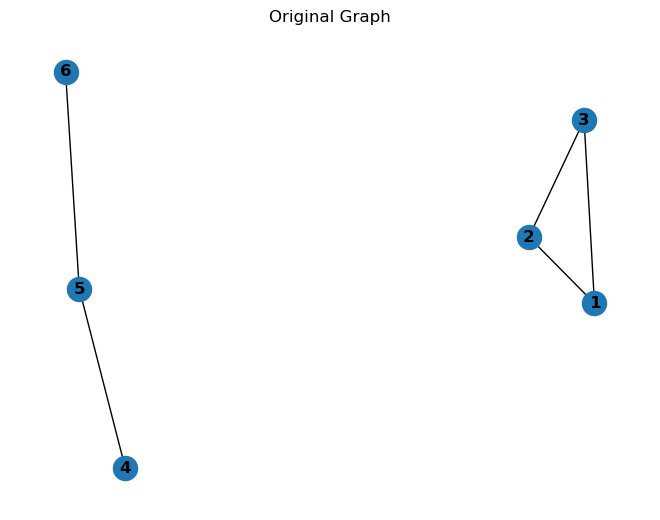

AttributeError: module 'networkx.algorithms.community' has no attribute 'best_partition'

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (4, 5), (5, 6)])

# Draw the original graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
plt.title("Original Graph")
plt.show()

# Partition the graph using Louvain method
partition = nx.community.best_partition(G)

# Create a new graph with nodes colored by their partition
color_map = [partition[node] for node in G.nodes]
nx.draw(G, pos, node_color=color_map, with_labels=True, font_weight='bold', cmap=plt.cm.Blues)
plt.title("Graph Partitioned into Independent Sets")
plt.show()